In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [7]:
data = pd.read_csv('C:/Users/Administrator/datasets/Logistic Regression/SAT-Admittance.csv')

In [8]:
data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [14]:
data['Admitted']=np.where(data['Admitted']=='Yes',1,0)

In [13]:
# data['Admitted'].map({'Yes':1,'No':0})

0      0
1      1
2      1
3      0
4      0
      ..
163    1
164    1
165    0
166    0
167    0
Name: Admitted, Length: 168, dtype: int64

In [15]:
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


Text(0, 0.5, 'Admitted')

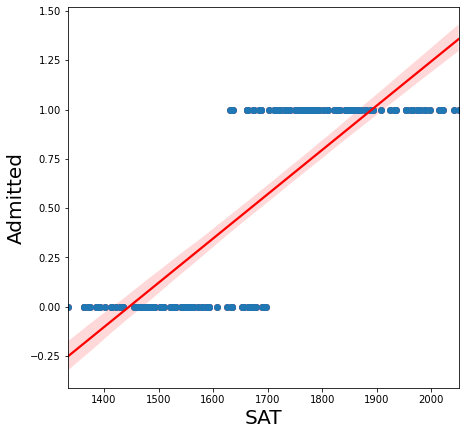

In [37]:
plt.figure(figsize=(7,7))
sns.regplot(x = 'SAT',y='Admitted',data = data,color = 'red')
plt.scatter(data['SAT'],data['Admitted'],color='C0')
#sns.scatterplot(x = 'SAT',y='Admitted',data = data)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)

In [39]:
# Linear Regression is not fit for this kind of analysis as we have probabilities that are less than 0 and more than 1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


Text(0, 0.5, 'Admitted')

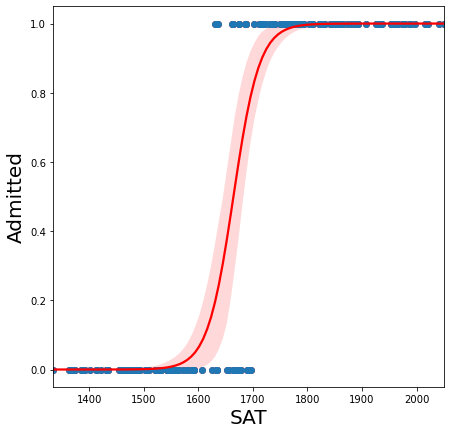

In [38]:
plt.figure(figsize=(7,7))
sns.regplot(x = 'SAT',y='Admitted',data = data,color = 'red', logistic=True)
plt.scatter(data['SAT'],data['Admitted'],color='C0')
#sns.scatterplot(x = 'SAT',y='Admitted',data = data)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)

In [40]:
# If SAT score is really low than probability of getting addmited is 0 & vice versa
# For score between 1600 & 1700 is uncertain

In [41]:
data = pd.read_csv('C:/Users/Administrator/datasets/classification/Telco-Customer-Churn.csv')

In [42]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [53]:
data = data[[ 'gender',  'Partner', 'Dependents',
       'PhoneService', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract',
        'MonthlyCharges', 'TotalCharges', 'Churn']]

In [56]:
data.head(10)

,gender,Partner,Dependents,PhoneService,InternetService,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,No,No,DSL,No,No,Month-to-month,29.85,29.85,No
1,Male,No,No,Yes,DSL,No,No,One year,56.95,1889.5,No
2,Male,No,No,Yes,DSL,No,No,Month-to-month,53.85,108.15,Yes
3,Male,No,No,No,DSL,No,No,One year,42.30,1840.75,No
4,Female,No,No,Yes,Fiber optic,No,No,Month-to-month,70.70,151.65,Yes
5,Female,No,No,Yes,Fiber optic,Yes,Yes,Month-to-month,99.65,820.5,Yes
6,Male,No,Yes,Yes,Fiber optic,Yes,No,Month-to-month,89.10,1949.4,No
7,Female,No,No,No,DSL,No,No,Month-to-month,29.75,301.9,No
8,Female,Yes,No,Yes,Fiber optic,Yes,Yes,Month-to-month,104.80,3046.05,Yes
9,Male,No,Yes,Yes,DSL,No,No,One year,56.15,3487.95,No


In [57]:
data = pd.read_csv('C:/Users/Administrator/datasets/titanic/titanic.csv')

In [59]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [61]:
data = data[[ 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked','Survived']]

In [63]:
data.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [64]:
from sklearn import datasets